# Estadísitca Aplicada
## Cinthya Yesenia López Díaz 1658003
### Sesión 11 - 10 marzo 2023

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# librerias para modelos de supervivencia
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [4]:
#datos
relacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [6]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


E una base de datos con 42 observaciones. Cuya finalidad era medir si alguien es detallista en la relación, esta dura más.
Se siguieron a las parejas de forma semanal, se asignó de forma aleatoria a la mitad a ser detallista, y la otra mitad no detallista. A los detallistas se les pdiio hacer por lo menos un regalo semanal a su pareja. A los no detallistas se les pidio que no hicieran ningun regalo.

### variables

**t**: tiempo en semanas

**tratamiento**: 1 si es detallista, 0 si no.

**estado**: 1 si termino la relación, 0 si no.

**objetivo**

Medir si ser detallista con tu pareja afecta la duración de la relación.

**hipótesis**

Si eres detallista la relación dura más porque muestra que te importa la relación.

In [7]:
relacion.describe()

,tratamiento,t,estado
count,42.000000,42.000000,42.000000
mean,0.500000,12.880952,0.714286
std,0.506061,9.347498,0.457230
min,0.000000,1.000000,0.000000
25%,0.000000,6.000000,0.000000
50%,0.500000,10.500000,1.000000
75%,1.000000,18.500000,1.000000
max,1.000000,35.000000,1.000000


In [8]:
relacion.groupby('tratamiento').agg(['mean','std'])

t              estado          
                  mean       std      mean       std
tratamiento                                         
0             8.666667  6.467869  1.000000  0.000000
1            17.095238  9.999524  0.428571  0.507093

In [9]:
detallistas = relacion.query('tratamiento==1')
no_detall = relacion.query('tratamiento==0')

In [10]:
km_d = KaplanMeierFitter().fit(detallistas['t'], detallistas['estado'])
km_nd = KaplanMeierFitter().fit(no_detall['t'], no_detall['estado'])

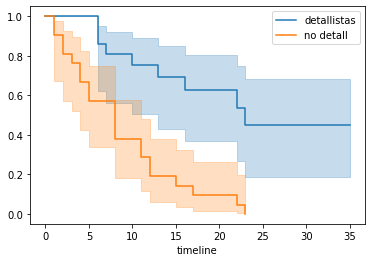

In [11]:
km_d.plot_survival_function(label='detallistas')
km_nd.plot_survival_function(label='no detall')
plt.show()

In [12]:
lrt = logrank_test(detallistas['t'],detallistas['estado'],
                  no_detall['t'],no_detall['estado'])

In [13]:
lrt.print_summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          42.45 <0.005     33.68

Con un $\alpha = 0.05$ se rechaza Ho, por tanto las funciones de supervivencia de detallistas y no detallistas son distintas.

In [14]:
cph = CoxPHFitter().fit(relacion,'t','estado')
cph.print_summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'estado'
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -85.01
         time fit was run = 2023-03-10 22:23:28 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
tratamiento  -1.57       0.21       0.41            -2.38            -0.76                 0.09                 0.47

              cmp to     z      p   -log2(p)
covariate                                   
tratamiento     0.00 -3.81 <0.005      12.83
---
Concordance = 0.69
Partial AIC = 172.02
log-likelihood ratio test = 16.35 on 1 df
-log2(p) of ll-ratio test = 14.21

1 - 0.21 = 79%
Ser detallista disminuye el riesgo de que termine la relación. 
Alguien que es detallista tiene 79% menos riesgo de que termine la relación 